<a href="https://colab.research.google.com/github/arnguyen140/Malaria-Detection/blob/main/Milestone_1_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>

In 2019, there were more than 229 million malaria cases and 400000 malaria-related deaths reported globally. Diagnosis of malaria by humans requires professional experience to discern the difference between healthy and infected blood cells. However, not only does professional experience take years to gain but the process of determining malaria itself is time-consuming and the accuracy of the diagnosis can be impacted by human error.

**The objectives:** What is the intended goal?<br>

The goal of the project is to use deep learning algorithms to help accurately detect malaria since machine learning and AI is more accurate and consistent than human classification. Thus, building a computer vision model that can classify images of uninfected red blood cells and parasitized cells, which are infected with malaria, will accomplish the goal of detecting malaria.

**The key questions:** What are the key questions that need to be answered?<br>

What signs indicate a cell is parasitized?

How can the model determine whether the cell is parasitized?

What techniques can be used on the images to make parasitized cells more obvious?

Which filtering techniques work best?

How accurate or reliable is the model?

**The problem formulation:** What is it that we are trying to solve using data science?

To solve the problem, the model should identify differences in color to find parasitized cells. For instance, if a model finds a cell containing dark purple blobs, the model should identify the cell is parasitized. If other methods are used, the presence of colors that are noticeably different from the cell color should tell the model the cell is parasitized.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
# Shape of images
print("Shape:", train_images.shape)
print("Shape:", test_images.shape)

Shape: (24958, 64, 64, 3)
Shape: (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels
print("Shape:", train_labels.shape)
print("Shape:", test_labels.shape)

Shape: (24958,)
Shape: (2600,)


**Observations and insights:** The train and test images both have a 4D shape. The 24958 value in the first dimension of the train images appears to refer to the 24958 train images in the dataset. Similarly, the 2600 value in the first dimension of the test images refers to the 2600 test images in the dataset. The 64 value in the second and third dimension of both shapes appear to refer to the size of the images.

The train labels and test labels both have a 1D shape. The train labels share the same value as the first dimension of the train images and the test labels share the same value as the first dimension of the test images.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
print("Train images min pixels: ",train_images.min())
print("Train images max pixels: ",train_images.max())

print("Test images min pixels: ",test_images.min())
print("Test images max pixels: ",test_images.max())


Train images min pixels:  0
Train images max pixels:  255
Test images min pixels:  0
Test images max pixels:  255


**Observations and insights:** The minimum pixel value for test and train images is 0 and the maximum pixel value for test and train images is 255. This pixel value range of 0 to 255 is typical.


###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Try to use value_counts to count the values
test_labels_series = pd.Series(test_labels)
print("1 = parasitized, 0 = uninfected")
print(test_labels_series.value_counts())

1 = parasitized, 0 = uninfected
1    1300
0    1300
dtype: int64


###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255.0).astype('float32')

test_images = (test_images/255.0).astype('float32')

**Observations and insights:** The number of uninfected and parasitized images are both 1300.

Normalizing the train and test images by converting the 0-255 scale to the 0-1 scale will transform features on a similar scale. This will improve the model's performance and training stability.



###<b> Plot to check if the data is balanced

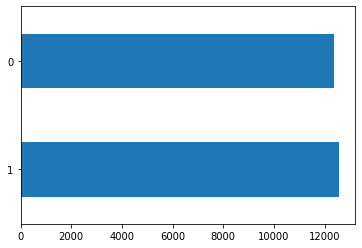

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
train_labels_series = pd.Series(train_labels)
train_labels_series.value_counts().plot(kind="barh")

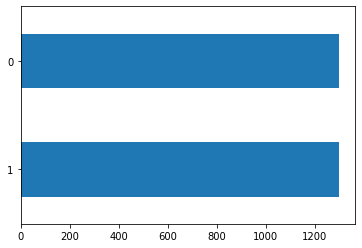

In [ ]:
test_labels_series.value_counts().plot(kind="barh")

**Observations and insights:** The labels of the train data are balanced with the count of both labels 0 and 1 being slightly higher than 12000.

The labels of the test data are balanced with the count of both labels 0 and 1 stopping above 1200.

### <b>Data Exploration</b>
Let's visualize the images from the train data

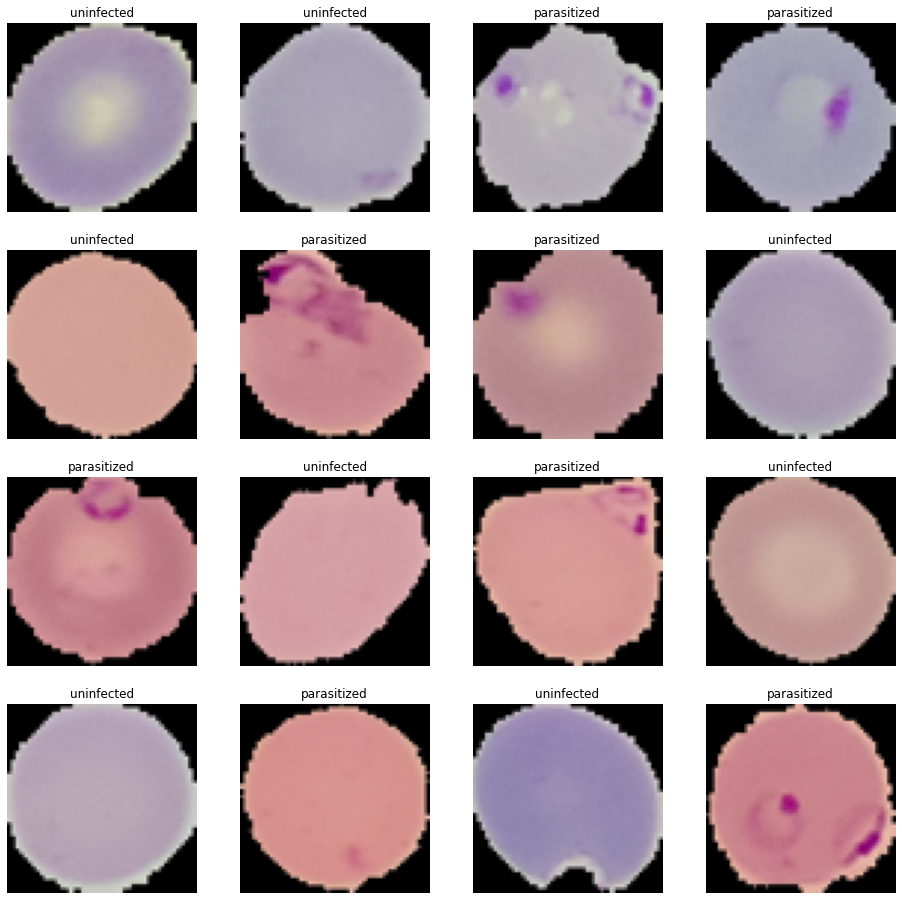

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

**Observations and insights:** Parasitized images contain dark purple blobs that contrast the color of the cells. On the other hand, uninfected images contain no dark purple blobs.

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

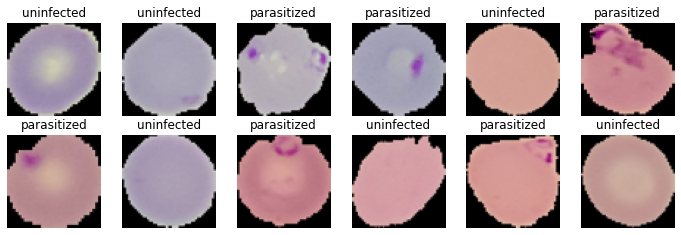

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 13):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')


**Observations and insights:** The clarity of the dark purple blobs at a smaller image resolution indicate that the dark purple blobs and parasitized cells are clearly identifiable.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

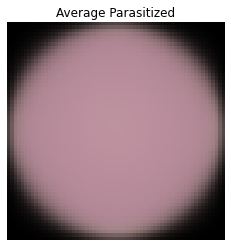

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:

              parasitized_data.append([img])

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

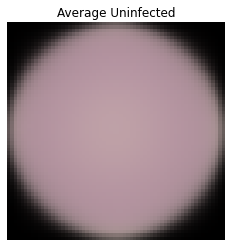

In [ ]:
# Similarly write the code to find the mean image of uninfected
uninfected_data = []

for img, label in zip(train_images, train_labels):

        if label == 0:

              uninfected_data.append([img])

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')

**Observations and insights:** The average parasitized image appears to have brighter, more saturated pink color. Meanwhile, the average uninfected image appears to have a darker, less saturated pink color.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

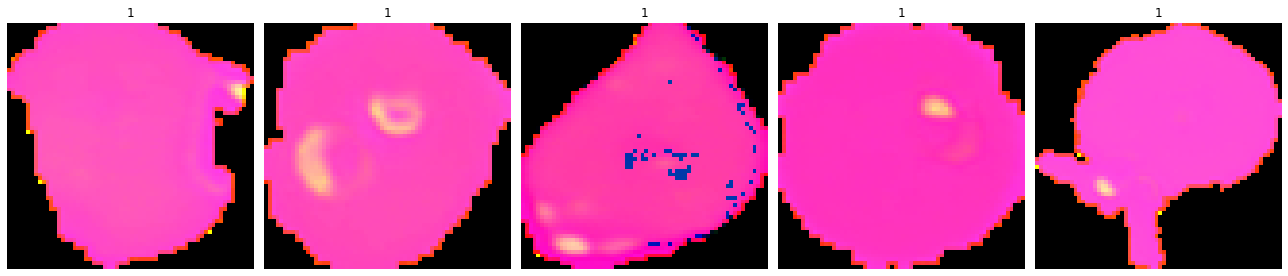

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Converting the test data

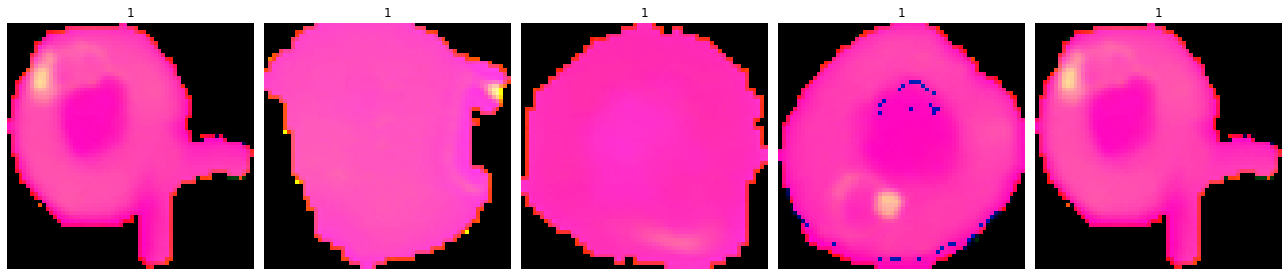

In [ ]:
# Similarly you can visualize for the images in the test data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

**Observations and insights:** In both the train and test data, the parasitized images have some yellow-white blobs in their pink cells.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

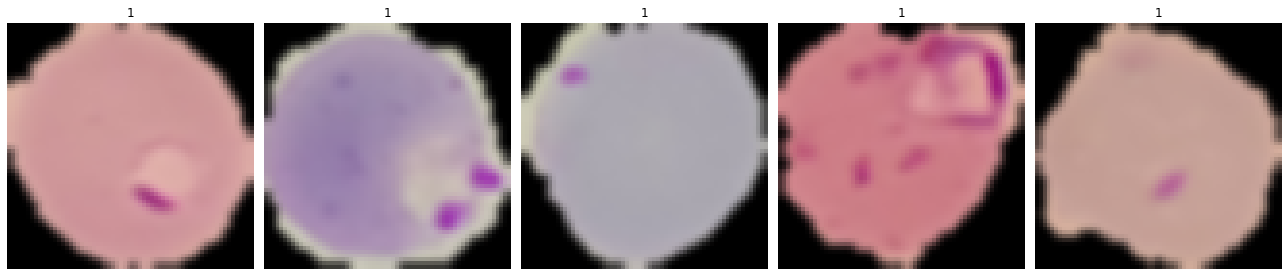

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Gaussian Blurring on test data

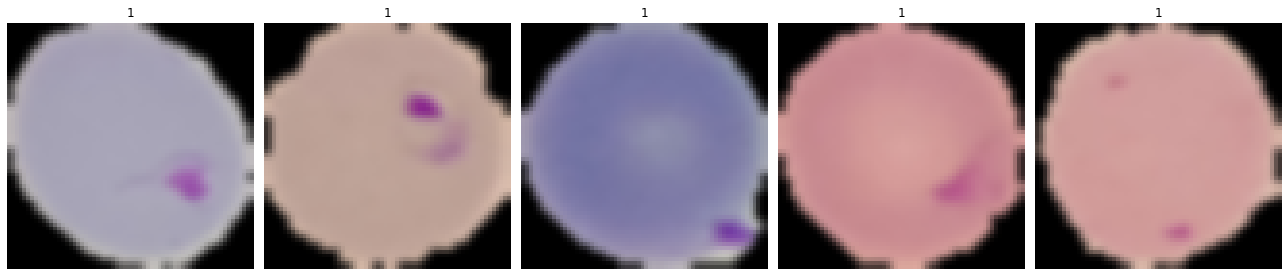

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

**Observations and insights:** In the train data, parasitized images with purple-gray cells have dark purple blobs. Meanwhile, parasitized images with pink cells have pink-purple blobs.

In the test data, parasitized images with a pink background have pink-purple blobs. Meanwhile, parasitized images with a dark-purple cell have darker purple blobs.

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

Blurring would remove some details from the images, but it does maintain differing shades and contrasts of colors, allowing parasitized images to still be identified. However, blurring doesn't seem to be the outright best approach. Another method could be using grayscale and identifying contrasting shades of blobs to find parasitized cells.

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>

Converting RGB to HSV, gaussian blurring, and converting the images to grayscale are all possible techniques that can be explored.

**Overall solution design:** What is the potential solution design?<br>

The potential solution design is to use one of the different techniques or all of them together and create a model that can identify colors differing from the color of the cell. If the model notices any trace of those differing colors such as noticeably dark purple, it can determine a parasitized image.

**Measures of success:** What are the key measures of success to compare different techniques?<br>

Accuracy would be the main measure of success to compare different techniques. Some sub areas of accuracy that would be measured are true positives, true negatives, false positives, and false negatives through precision values and recall values. Therefore, measuring accuracy could be done using a classification report, confusion matrix, and heat map.